# Cafe Database Management System

## Connecting to Database

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
db = mysql.connector.connect(host="localhost", user="root", passwd="1234", database="cafe")
pd.set_option('display.max_rows', None)
def create_cursor():
    return db.cursor()

## Schema Info

In [2]:
def schema_info():
    print()
    cursor = create_cursor()
    cursor.execute("""show tables""")
    x = [i[0] for i in cursor]
    for i in x:
        print("Heading: " + i)
        cursor.execute("describe {}".format(i))
        for j in cursor:
            print(j)
        print()

## Menu Related Functions

In [3]:
def insert_menu(item, price):
    cursor = create_cursor()
    query = """Select food_name from menu where food_name = '{}'""".format(item)
    cursor.execute(query)
    x = [i[0] for i in cursor]
    if len(x):
        print("Item already Present")
        return
    else:
        query = """insert into menu(food_name, price) values('{}', {})""".format(item, price)
        cursor.execute(query)
        last_id = cursor.lastrowid
        print("Record Entered:\n\tFood ID: {}\n\tName: {}\n\tPrice: {}\n".format(last_id, item, price))
        print("Rows Affected: {}".format(cursor.rowcount))

def delete_menu(item):
    cursor = create_cursor()
    query = """Select food_id from menu where food_name = '{}'""".format(item)
    cursor.execute(query)
    x = [i[0] for i in cursor]
    if len(x):
        x = x[0]
        query = """delete from menu where food_id = {}""".format(x)
        cursor.execute(query)
        print("Record Deleted:\n\tFood ID: {}\n\tName: {}\n".format(x, item))
        print("Rows Affected: {}".format(cursor.rowcount))
    else:
        print("No Such Item in the menu")


def update_menu(old_name, new_name):
    cursor = create_cursor()
    query = """Select food_id 
                      from menu 
                      where food_name = '{}'""".format(old_name)
    cursor.execute(query)
    x = [i[0] for i in cursor]
    if len(x):
        query = """update menu 
                          set food_name = '{}' 
                          where food_id = {}""".format(new_name, x[0])
        cursor.execute(query)
        print("""Record Updated:
                \tFood ID: {}
                \tOld Name: {}
                \tNew Name: {}""".format(x[0], old_name, new_name))
        print("Rows Affected: {}".format(cursor.rowcount))
    else:
        print("No Such Item in the menu")
        
def menu_functions():
    print("\nMenu Related Functions")
    choice = 0
    while choice != -1:
        print("1. Add To Menu")
        print("2. Remove From Menu")
        print("3. Update Menu")
        print("4. Go Back")
        choice = eval(input("Enter Choice: "))
        
        if choice == 1:
            item = input("Enter Item Name: ")
            while item == "":
                print("Please Enter A Name..")
                fname = input("Enter Item Name: ")
                
            price = input("Enter Price: ")
            while price == "":
                print("Please Enter A Price..")
                price = eval(input("Enter Price: "))
            price = float(price)
            insert_menu(item, price)
            
        elif choice == 2:
            item = input("Enter Item Name: ")
            while item == "":
                print("Please Enter an Item Name..")
                item = eval(input("Enter Item Name: "))
            delete_menu(item)
            
        elif choice == 3:
            old_name = input("Enter Current Name: ")
            while old_name == "":
                print("Please Enter a Name..")
                old_name = input("Enter Current Name: ")
                
            new_name = input("Enter New Name: ")
            while new_name == "":
                print("Please Enter a Name..")
                new_name = input("Enter New Name: ")
                
            update_menu(old_name, new_name)
            
        elif choice == 4:
            choice = -1    
        else: 
            print("Invalid Choice, Retry..")
            choice = 0
        db.commit()
    print("Returning..")

## Customer Related Functions

In [4]:
def insert_customer(f_name, l_name, phone):
    cursor = create_cursor()
    query = """insert into customer(fname, lname, phone) 
                values('{}', 
                       '{}', 
                       '{}')""".format(f_name, l_name, phone)
    cursor.execute(query)
    last_id = cursor.lastrowid
    print("""Record Entered:
            \tCustomer ID: {}
            \tName: {}
            \tPhone: {}""".format(last_id, f_name + " " + l_name, phone))
    print("Rows Affected: {}".format(cursor.rowcount))

def update_customer(cus_id, f_name, l_name, phone):
    cursor = create_cursor()
    query = """select c_id, fname, lname, phone 
               from customer 
               where c_id = {}""".format(cus_id)
    cursor.execute(query)
    x = [i for i in cursor]
    if(len(x)):
        x = x[0]
        if f_name == "":
            f_name = x[1]
        if l_name == "":
            l_name = x[2]
        if f_name == "":
            phone = x[3]
        query = """update customer 
                   set fname = '{}', 
                   lname = '{}', 
                   phone = '{}' 
                   where c_id = {}""".format(f_name, 
                                             l_name, 
                                             phone, 
                                             cus_id)
        cursor.execute(query)
    else:
        print("Customer Doesn't Exist")

def customer_functions():
    print("\nCustomer Related Functions")
    choice = 0
    while choice != -1:
        print("1. Add User")
        print("2. Update User")
        print("3. Go Back")
        choice = eval(input("Enter Choice: "))
        if choice == 1:
            fname = input("Enter First Name: ")
            while fname == "":
                print("Please Enter A Name..")
                fname = input("Enter First Name: ")
                
            lname = input("Enter Last Name: ")
            phone = input("Enter Phone Number: ")
            insert_customer(fname, lname, phone)
            
        elif choice == 2:
            c_id = input("Enter Customer ID: ")
            while c_id == "":
                print("Please Enter an Customer ID..")
                c_id = input("Enter Customer ID: ")
            c_id = int(c_id)
            fname = input("Enter Updated First Name/Leave Blank: ")
            lname = input("Enter Updated Last Name/Leave Blank: ")
            phone = input("Enter Updated Phone/Leave Blank: ")
            update_customer(c_id, fname, lname, phone)
            
        elif choice == 3:
            choice = -1
        else: 
            print("Invalid Choice, Retry..")
            choice = 0
    print("Returning..")

## Employee Related Functions

In [5]:
def insert_employee(fname, lname, phone, addr, pay):
    cursor = create_cursor()
    query = """insert into employee(fname, lname, phone, addr, pay)
               values('{}', '{}','{}',
                      '{}', '{}')""".format(fname, lname, phone, addr, pay)
    try:
        cursor.execute(query)
        last_id = cursor.lastrowid
        print("""Record Entered:
                \tEmployee ID: {}
                \tName: {}
                \tPhone: {}
                \tAddress: {}
                Pay: {}""".format(last_id, 
                                fname + " " + lname, 
                                phone, 
                                addr, 
                                pay))
        print("Rows Affected: {}".format(cursor.rowcount))
    except mysql.connector.Error as err:
        print("Error: {}".format(err))


def delete_employee(emp_id):
    cursor = create_cursor()
    query = """select e_id, fname, lname 
               from employee 
               where e_id = {}""".format(emp_id)
    cursor.execute(query)
    x = [i for i in cursor]
    if len(x):
        x = x[0]
        query = """delete from employee 
                   where e_id = {}""".format(emp_id)
        cursor.execute(query)
        print("""Record Deleted:
               \tEmployee ID: {}
               \tName: {}\n""".format(x[0], x[1] + " " + x[2]))
        print("Rows Affected: {}".format(cursor.rowcount))
    else:
        print("Employee Doesn't Exist")


def update_employee(emp_id, fname, lname, phone, addr, pay):
    cursor = create_cursor()
    query = """select * 
               from employee 
               where e_id = {}""".format(emp_id)
    cursor.execute(query)
    x = [i for i in cursor]
    if len(x):
        x = x[0]
        if fname == "": 
            fname = x[1]
        if lname == "": 
            lname = x[2]
        if phone == "":
            phone = x[3]
        if addr == "":
            addr = x[4]
        if pay == 0:
            pay = x[5]
        query = """update employee 
                   set fname = '{}', 
                       lname = '{}', 
                       phone = '{}', 
                       addr = '{}', 
                       pay = {}""".format(fname, lname, phone, addr, pay)
        cursor.execute(query)
        print("""Record Updated:
               \tEmployee ID: {}
               \tName: {}
               \tPhone: {}
               \tAddress: {}
               \tPay: {}""".format(emp_id, fname, lname, phone, addr, pay))
    else:
        print("Employee Doesn't exist")
        
def employee_functions():
    print("\nEmployee Related Functions")
    choice = 0
    while choice != -1:
        print("1. Add Employee")
        print("2. Remove Employee")
        print("3. Update Employee")
        print("4. Go Back")
        choice = eval(input("Enter Choice: "))
        if choice == 1:
            fname = input("Enter First Name: ")
            while fname == "":
                print("Please Enter A Name..")
                fname = input("Enter First Name: ")
                
            lname = input("Enter Last Name: ")
            phone = input("Enter Phone Number: ")
            while phone == "":
                print("Please Enter A Number..")
                phone = input("Enter Phone Number: ")
            addr = input("Enter Address: ")
            pay = input("Enter Pay: ")
            while pay == "":
                print("Please Enter An Amount..")
                pay = input("Enter Pay: ")
            pay = float(pay)
            insert_employee(fname, lname, phone, addr, pay)
            
        elif choice == 2:
            emp_id = input("Enter Employe ID: ")
            while emp_id == "":
                print("Please Enter an Employee ID..")
                emp_id = input("Enter Employe ID: ")
            emp_id = int(emp_id)
            delete_employee(emp_id)
            
        elif choice == 3:
            emp_id = input("Enter Emploee ID: ")
            while emp_id == "":
                print("Please Enter an Employee ID..")
                emp_id = input("Enter Employe ID: ")
            emp_id = int(emp_id)
            fname = input("Enter Updated First Name/Leave Blank: ")
            lname = input("Enter Updated Last Name/Leave Blank: ")
            phone = input("Enter Updated Phone/Leave Blank: ")
            addr = input("Enter Updated addr/Leave Blank: ")
            pay = input("Enter Updated Pay/Leave Blank: ")
            if pay == "":
                pay = 0
            pay = float(pay)
            update_employee(emp_id, fname, lname, phone, addr, pay)
            
        elif choice == 4 or choice == '4':
            choice = -1    
        else: 
            print("Invalid Choice, Retry..")
            choice = 0
        db.commit()
    print("Returning..")

## Place Order

In [6]:
def place_order(cus_id, emp_id):
    cursor = create_cursor()
    query = """select c_id 
               from customer 
               where c_id = {}""".format(cus_id)
    cursor.execute(query)
    customer = [i for i in cursor]
    query = """select e_id 
               from employee 
               where e_id = {}""".format(emp_id)
    cursor.execute(query)
    employee = [i for i in cursor]
    if len(customer) and len(employee):
        query = """insert into orders(cus_id, emp_id) 
                   values({}, {})""".format(cus_id, emp_id)
        cursor.execute(query)
        order_id = cursor.lastrowid
        cursor.execute("select * from menu")
        print("%5s\t%5s\t%25s\t%5s"%("Index", "ID", "Name", "Price"))
        menu = list()
        
        for i in cursor:
            print("%5d\t%5d\t%25s\t%5.3f"%(len(menu)+1, i[0], 
                                           i[1], i[2]))
            menu.append(i)
        print("Enter -1 to Exit")
        print()
        order_dict = dict()
        choice = 0
        while choice != -1:
            choice = int(input("Enter Index of Item: "))
            if choice > len(menu) or choice ==  0:
                print("Invalid Choice, Please Re Enter....\n")
                continue;
            if choice > 0:
                quantity = int(input("Enter Quantity: "))
                if quantity:
                    if menu[choice - 1][1] not in order_dict:
                        order_dict[menu[choice - 1][1]] = [quantity, order_id, menu[choice - 1][0]]
                    else:
                        order_dict[menu[choice - 1][1]][0] += quantity
                        
        for i in order_dict:
            query = """insert into 
                   items(item_name, 
                         quantity,
                         order_id,
                         food_id) 
                   values('{}', {},
                           {}, {})""".format(i, 
                                             order_dict[i][0], 
                                             order_dict[i][1], 
                                             order_dict[i][2])
            cursor.execute(query)
            print("Rows Affected: {}".format(cursor.rowcount), end="\n\n")
        db.commit()
        query = """select item_name, quantity, price 
                   from (select * from items left join menu 
                   using(food_id)) as temp 
                   where temp.order_id = {}""".format(order_id)
        cursor.execute(query)
        bill = [i for i in cursor]
        print("\n\n%25s\t|%10s\t|%10s"%("Item", "Quantity", "Price"))
        print("-"*60)
        total = 0
        for i in bill:
            print("%25s\t|%10d\t|%10.2f"%(i[0], i[1], i[2]*i[1]))
            total += i[1]*i[2]
        print("-"*60)
        print("%38sTotal Cost: %10.2f"%(" ", total))
        print("-"*60, "\n")
        
def take_orders():
    print("\nOrdering Section")
    while True:
        cus_id = input("Enter Customer ID: ")
        while cus_id == "":
            print("Print Please Enter A Customer ID..")
            cus_id = input("Enter Customer ID: ")
        cus_id = int(cus_id)
        emp_id = input("Enter Employee ID: ")
        while emp_id == "":
            print("Print Please Enter An Employee ID..")
            emp_id = input("Enter Employee ID: ")
        emp_id = int(emp_id)
        place_order(cus_id, emp_id)
        
        flag = input("Take More Orders?(Y/N)")
        if flag == 'N' or flag == 'n':
            break
    db.commit()
    print("Returning..")

## Statistic Related Functions

In [7]:
def one_item(item_id):
    cursor = create_cursor()
    query = """select quantity, order_date 
               from (select 
                      coalesce(SUM(quantity), 0) as quantity, 
                      order_date, food_id 
                  from (select * 
                      from (select 
                          quantity, 
                          DATE(order_date) as order_date, 
                          food_id 
                            from items left outer join orders 
                            on orders.o_id = items.order_id) as temp 
                            where 
                            datediff(temp.order_date, 
                                    CURRENT_TIMESTAMP) <= 30) as temp1 
                      group by food_id, order_date) as temp2 
              where food_id = {}""".format(item_id)
    cursor.execute(query)
    orders = [i for i in cursor]
    if len(orders):
        orders_dict = dict()
        for i in orders:
            if i[0] not in orders_dict:
                orders_dict[str(i[1])] = int(i[0])
        lists = orders_dict.items()
        x, y = zip(*lists)

        fig = plt.figure(figsize=(60, 60))
        ax = fig.add_axes([0.1, 0.1, 0.1, 0.1])
        ax.bar(x, y, width=0.2)
        plt.title("Sale For Item ID {}".format(item_id))
        plt.show()
    else:
        print("Item has not been ordered in the past month")

def sale_per_item():
    cursor = create_cursor()
    query = """select 
                coalesce(SUM(quantity), 0), 
                menu.food_name, 
                menu.food_id, 
                price 
               from items right join menu 
               on menu.food_id = items.food_id 
               group by menu.food_id"""
    cursor.execute(query)
    items = [i for i in cursor]
    items_dict = dict()
    for i in items:
        if i[1] not in items_dict:
            items_dict[i[1]] = i[0]

    lists = items_dict.items()
    x, y = zip(*lists)
    fig = plt.figure(figsize=(100, 100))
    ax = fig.add_axes([0.1, 0.1, 0.1, 0.1])
    ax.barh(x, y, color = "blue")
    plt.ylabel("Menu Items")
    plt.xlabel("Total Sale")
    plt.title("Sale For Each Item")
    plt.show()
    
    
    items_dict = dict()
    for i in items:
        if i[1] not in items_dict:
            items_dict[i[1]] = float("%.2f"%(int(i[0]) * i[3]))  
    lists = items_dict.items()
    x, y = zip(*lists)
    
    fig = plt.figure(figsize=(100, 100))
    ax = fig.add_axes([0.1, 0.1, 0.1, 0.1])
    ax.barh(x, y, color = "red")
    plt.ylabel("Menu Items")
    plt.xlabel("Total Income")
    plt.title("Income From Each Item")
    plt.show()
    print()

def monthly_sales():
    cursor = create_cursor()
    query = """select quantity, food_id 
               from (select coalesce(SUM(quantity), 0) as quantity, 
               order_date, food_id 
               from (select * 
               from (select 
               quantity, DATE(order_date) as order_date, 
               food_id 
               from items left outer join orders 
               on orders.o_id = items.order_id) as temp 
               where datediff(temp.order_date, CURRENT_TIMESTAMP) <= 30) 
               as temp1 
               group by food_id) as temp2 
               order by food_id"""
    cursor.execute(query)
    sales = [i for i in cursor]
    sales_dict = dict()
    for i in sales:
        if i[1] not in sales_dict:
            sales_dict[i[1]] = int(i[0])
    lists = sales_dict.items()
    x, y = zip(*lists)
    fig = plt.figure(figsize=(50, 50))
    ax = fig.add_axes([0.1, 0.1, 0.1, 0.1])
    ax.plot(x, y, color = "red")
    plt.xlabel("Item ID")
    plt.ylabel("Number of Sales")
    plt.title("Monthly Sales")
    plt.show()
    
def check_statistics():
    choice = 0
    while choice != -1:
        print("\nCheck Statistics for:")
        print("1. Sale Related to an Item")
        print("2. Sale Per Item")
        print("3. Monthly Sale")
        print("4. Exit")
        choice = eval(input("Enter your Choice: "))
        
        if choice == 1:
            item_id = input("Enter Item ID: ")
            while item_id == "":
                print("Please Enter An Item ID: ")
                item_id = input("Enter Item ID: ")
            item_id = int(item_id)
            one_item(item_id)

        elif choice == 2:
            sale_per_item()
        elif choice == 3:
            monthly_sales()
        elif choice == 4:
            choice = -1
        else:
            print("Invalid Choice, Retry...")
            choice = 0
        db.commit()
    print("Returning..")

## Main Function


1. Show Schema Description
2. Customer Related Database Functions
3. Employee Related Database Functions
4. Menu Related Database Functions
5. Take Orders
6. Statistics Related Functions
7. Exit
Enter Your Choice: 6

Check Statistics for:
1. Sale Related to an Item
2. Sale Per Item
3. Monthly Sale
4. Exit
Enter your Choice: 1
Enter Item ID: 205


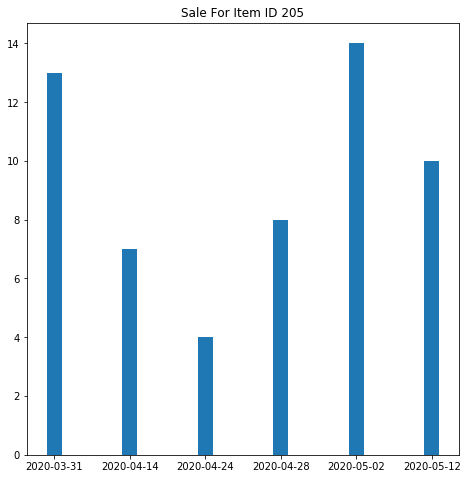


Check Statistics for:
1. Sale Related to an Item
2. Sale Per Item
3. Monthly Sale
4. Exit
Enter your Choice: 2


In [ ]:
choice = 0
while choice != -1:
    print()
    print("1. Show Schema Description")
    print("2. Customer Related Database Functions")
    print("3. Employee Related Database Functions")
    print("4. Menu Related Database Functions")
    print("5. Take Orders")
    print("6. Statistics Related Functions")
    print("7. Exit")
    
    choice = eval(input("Enter Your Choice: "))
    
    if choice == 1:
        schema_info()
    elif choice == 2:
        customer_functions()
    elif choice == 3:
        employee_functions()
    elif choice == 4:
        menu_functions()
    elif choice == 5:
        take_orders()
    elif choice == 6:
        check_statistics()
    elif choice == 7:
        choice = -1
    else:
        print("Invalid Input, Please try again")
        choice = 0
    print()

## Complex Syntax

#### Monthly Sales
SELECT quantity, food_id FROM(<br>
&emsp; SELECT COALESCE(SUM(quantity), 0) AS quantity, order_date, food_id FROM<br>
&emsp;&emsp; (SELECT * FROM<br>
&emsp;&emsp;&emsp; (SELECT quantity, DATE(order_date) AS order_date, food_id FROM<br>
&emsp;&emsp;&emsp;&emsp; items LEFT OUTER JOIN orders ON orders.o_id = items.order_id) AS temp<br>
&emsp;&emsp;&emsp;WHERE<br>
&emsp;&emsp;&emsp;&emsp;DATEDIFF(temp.order_date, CURRENT_TIMESTAMP) <= 30) AS temp1<br>
&emsp;&emsp;&emsp;GROUP BY food_id) AS temp2<br>
ORDER BY food_id<br>

#### Sale Per Item

SELECT COALESCE(SUM(quantity), 0), menu.food_name, menu.food_id, price FROM<br>
&emsp; items RIGHT JOIN menu ON menu.food_id = items.food_id<br>
GROUP BY menu.food_id<br>

####  Sale For a Particular Item
SELECT quantity, order_date FROM<br>
&emsp; (SELECT COALESCE(SUM(quantity), 0) AS quantity, order_date, food_id FROM<br>
&emsp;&emsp;(SELECT * FROM<br>
&emsp;&emsp;&emsp;(SELECT quantity, DATE(order_date) AS order_date, food_id FROM<br>
&emsp;&emsp;&emsp;&emsp;items LEFT OUTER JOIN orders ON orders.o_id = items.order_id) AS temp<br>
&emsp;&emsp;WHERE<br>
&emsp;&emsp;&emsp;DATEDIFF(temp.order_date, CURRENT_TIMESTAMP) <= 30) AS temp1<br>
&emsp;&emsp;GROUP BY food_id , order_date) AS temp2<br>
WHERE<br>
&emsp;food_id = 201;<br>

### Show Menu

In [8]:
def show_menu():
    cursor = create_cursor()
    cursor.execute("select * from menu")
    menu = [i for i in cursor]
    menu_df = pd.DataFrame(menu[::-1], columns=["Food ID", "Food Name", "Price"])
    return (menu_df, len(menu))

### Show Items

In [9]:
def show_items():
    cursor = create_cursor()
    cursor.execute("select * from items")
    items = [i for i in cursor]
    items_df = pd.DataFrame(items[::-1], columns=["Item Name", "Quantity", "Order ID", "Food ID"])
    return (items_df, len(items))

### Show Orders

In [10]:
def show_orders():
    cursor = create_cursor()
    cursor.execute("select * from orders")
    orders = [i for i in cursor]
    orders_df = pd.DataFrame(orders[::-1], columns=["Order ID", "Date", "Customer ID", "Employee ID"])
    return (orders_df, len(orders))

### Show Customers

In [11]:
def show_customers():
    cursor = create_cursor()
    cursor.execute("select * from customer")
    customer = [i for i in cursor]
    customer_df = pd.DataFrame(customer[::-1], columns=["Customer ID", "First Name", "Last Name", "Phone"])
    return (customer_df, len(customer))

### Show Employees

In [12]:
def show_employees():
    cursor = create_cursor()
    cursor.execute("select * from employee")
    employee = [i for i in cursor]
    employee_df = pd.DataFrame(employee[::-1], columns=["Employee ID", "First Name", "Last Name", "Phone", "Address", "Pay"])
    return (employee_df, len(employee))

### Testing Insert Into Employee Trigger

##### Before Insert Into Employee Trigger syntax
CREATE DEFINER=`root`@`localhost` TRIGGER `employee_BEFORE_INSERT` BEFORE INSERT ON `employee` FOR EACH ROW BEGIN<br>
DECLARE MSG varchar(255);<br>
if(exists(select * from employee where fname = new.fname and lname = new.lname and phone = new.phone)) then<br>
&emsp;set MSG = 'Employee Already Exists';<br>
&emsp;SIGNAL SQLSTATE '42000' SET MESSAGE_TEXT = msg;<br>
end if;<br>
END<br>

In [13]:
insert_employee('Tony', 'Stark','9829102928','Stark Towers, NY', '80000')
#-- Firing Insert duplicate trigger
insert_employee('Tony', 'Stark','9829102928','Stark Towers, NY', '80000')

Record Entered:
                	Employee ID: 61
                	Name: Tony Stark
                	Phone: 9829102928
                	Address: Stark Towers, NY
                Pay: 80000
Rows Affected: 1
Error: 1644 (42000): Employee Already Exists


### Adding Test Data

In [14]:
# -- Take Orders 
insert_menu("Test Item", 550)
insert_customer('Afzal', 'M', '9892819281')

Record Entered:
	Food ID: 245
	Name: Test Item
	Price: 550

Rows Affected: 1
Record Entered:
            	Customer ID: 10058
            	Name: Afzal M
            	Phone: 9892819281
Rows Affected: 1


In [17]:
cursor = create_cursor()
# cursor.execute("insert into orders(cus_id, emp_id) values(10058, 61)")
cursor.execute("insert into items(item_name, quantity, order_id, food_id) values('Test Item', 5, 107, 245)")

In [22]:
df, n = show_orders()
df.head(5)

,Order ID,Date,Customer ID,Employee ID
0,107,2020-06-01 16:42:32,10058,61
1,102,2020-05-28 00:38:40,10012,30
2,101,2020-05-28 00:38:40,10009,41
3,100,2020-05-28 00:38:40,10019,19
4,99,2020-05-28 00:38:40,10016,40


In [20]:
df, n = show_items()
df.head(5)

,Item Name,Quantity,Order ID,Food ID
0,Updated Test Item,5,107,245
1,Garlic Cheese Toast,4,102,221
2,Chicken Steak with Mash Potato,5,102,216
3,Tex Mex Burger,6,102,210
4,Carolina BBQ Chicken Burger,1,102,206


### Testing Menu Update Trigger

##### Trigger on updating menu syntax
CREATE DEFINER=`root`@`localhost` TRIGGER `menu_AFTER_UPDATE` AFTER UPDATE ON `menu` FOR EACH ROW BEGIN<br>
if(exists(select items.item_name from items where items.item_name = old.food_name)) then<br>
&emsp;update items set items.item_name = new.food_name where items.item_name = old.food_name;<br>
end if;<br>
END<br>

##### Trigger for deleting from the menu syntax
CREATE DEFINER=`root`@`localhost` TRIGGER `menu_BEFORE_DELETE` BEFORE DELETE ON `menu` FOR EACH ROW BEGIN<br>
if(exists(select items.food_id from items where items.food_id = old.food_id)) then<br>
&emsp;delete from items where items.food_id = old.food_id;<br>
end if;<br>
END<br>

In [19]:
cursor = create_cursor()
cursor.execute("update menu set food_name = 'Updated Test Item' where food_id = 245")
df, n = show_menu()
df.head(5)

,Food ID,Food Name,Price
0,245,Updated Test Item,550.0
1,239,Chiccy Nuggies,150.0
2,238,Belgian Chocolate,150.0
3,237,Frozen Mud Pie,275.0
4,236,Red Velvet Cup Cake,150.0


In [21]:
df, n = show_items()
df.head(5)

,Item Name,Quantity,Order ID,Food ID
0,Updated Test Item,5,107,245
1,Garlic Cheese Toast,4,102,221
2,Chicken Steak with Mash Potato,5,102,216
3,Tex Mex Burger,6,102,210
4,Carolina BBQ Chicken Burger,1,102,206


### Trigger on Deleting Employee

##### Trigger on deleting from employee syntax
CREATE DEFINER=`root`@`localhost` TRIGGER `employee_BEFORE_DELETE` BEFORE DELETE ON `employee` FOR EACH ROW BEGIN<br>
if(exists(select emp_id from orders where emp_id = old.e_id)) then<br>
&emsp;delete from orders where emp_id = old.e_id;<br>
end if;<br>
END<br>

##### Trigger on deleting from orders syntax
CREATE DEFINER=`root`@`localhost` TRIGGER `orders_BEFORE_DELETE` BEFORE DELETE ON `orders` FOR EACH ROW BEGIN<br>
if(exists(select o_id from orders where orders.o_id = old.o_id)) then<br>
&emsp;delete from items where items.order_id = old.o_id;<br>
end if;<br>
END<br>

In [24]:
cursor.execute("delete from employee where e_id = 61")
df, n = show_employees()
df.head(n)

,Employee ID,First Name,Last Name,Phone,Address,Pay
0,50,Mallory,Easton,8291214003,"504 S. Rose St. Bronx, NY 10451",4100.0
1,49,Mahek,Sienna,8052202254,"92 Pearl St. Raeford, NC 28376",4600.0
2,48,Curtis,Carney,8585956218,"21 S. Wintergreen St. Yakima, WA 98908",4800.0
3,47,Cotton,Rollins,9053664998,"784 Brewery Road South Lyon, MI 48178",3200.0
4,46,Berat,Hakim,8498460385,"420 S. Somerset Rd. Eugene, OR 97402",2100.0
5,45,Kezia,Hammond,9930885497,"961 Addison St. Palm Bay, FL 32907",2700.0
6,44,Geraint,Ramsey,9225307879,"72 Summer Drive Woodstock, GA 30188",4600.0
7,43,Seb,Vienna,8248207105,"386 San Pablo St. Jupiter, FL 33458",4000.0
8,42,Alicja,Uzair,8579927064,"7959 Indian Summer Drive Upper Darby, PA 19082",5000.0
9,41,Aiysha,Brian,9055934603,"7022 North Jones St. Milwaukee, WI 53204",3700.0


In [25]:
df, n = show_orders()
df.head(5)

,Order ID,Date,Customer ID,Employee ID
0,102,2020-05-28 00:38:40,10012,30
1,101,2020-05-28 00:38:40,10009,41
2,100,2020-05-28 00:38:40,10019,19
3,99,2020-05-28 00:38:40,10016,40
4,98,2020-05-28 00:38:40,10007,12


In [26]:
df, n = show_items()
df.head(5)

,Item Name,Quantity,Order ID,Food ID
0,Garlic Cheese Toast,4,102,221
1,Chicken Steak with Mash Potato,5,102,216
2,Tex Mex Burger,6,102,210
3,Carolina BBQ Chicken Burger,1,102,206
4,Peri Peri Paneer Burger,4,102,204
